# Simulated Data

Notes: 
- 30 patients: 10 adults / children / adolecents
- Used the basal-bolus controller

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('simglucose_contr-bolus-basal_computed-settings-True.csv', parse_dates=['date'], index_col='date')

In [3]:
df.head()

,id,CGM,carbs,insulin,scheduled_basal,basal,bolus,TDD,isf,cr,insulin_type,weight,ice,iob
date,,,,,,,,,,,,,,
2025-08-04 00:00:00,adolescent#001,135.865707,0.0,0.069667,0.836,0.836,0.0,31.65,56.88,15.8,novolog,151.470622,NaN,NaN
2025-08-04 00:05:00,adolescent#001,136.054447,0.0,0.069667,0.836,0.836,0.0,31.65,56.88,15.8,novolog,151.470622,NaN,1.387779e-17
2025-08-04 00:10:00,adolescent#001,139.350663,0.0,0.069667,0.836,0.836,0.0,31.65,56.88,15.8,novolog,151.470622,NaN,2.775558e-17
2025-08-04 00:15:00,adolescent#001,144.059151,0.0,0.069667,0.836,0.836,0.0,31.65,56.88,15.8,novolog,151.470622,NaN,4.159992e-17
2025-08-04 00:20:00,adolescent#001,148.564924,0.0,0.069667,0.836,0.836,0.0,31.65,56.88,15.8,novolog,151.470622,NaN,5.534941e-17


## Some Stats

<Axes: >

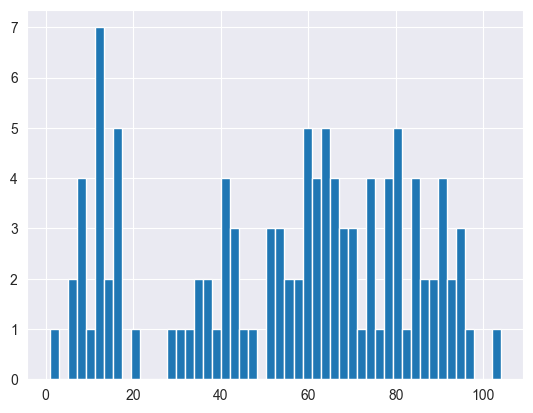

In [4]:
# Plot histogram of carb quantities
df['carbs'][df['carbs'] > 0].hist(bins=50)

/var/folders/q1/5jqy1fgs07j9ptpmdsmmhxnw0000gn/T/ipykernel_9605/3892776295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['hour'] = filtered.index.hour  # This assumes df.index is datetime


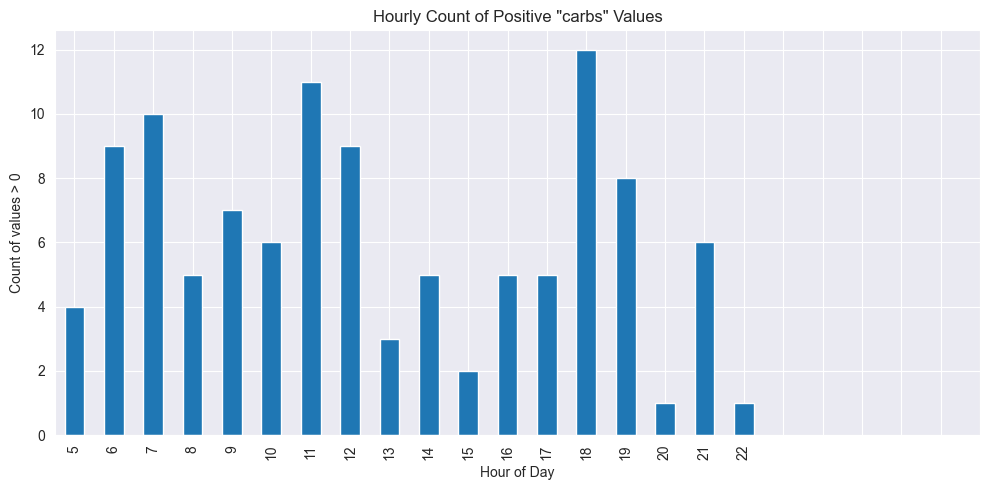

In [5]:
filtered = df[df['carbs'] > 0]

# Step 2: Extract the hour of the day from the index
filtered['hour'] = filtered.index.hour  # This assumes df.index is datetime

# Step 3: Count how many times each hour occurs
hourly_counts = filtered['hour'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Count of values > 0')
plt.title('Hourly Count of Positive "carbs" Values')
plt.xticks(range(0, 24))
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

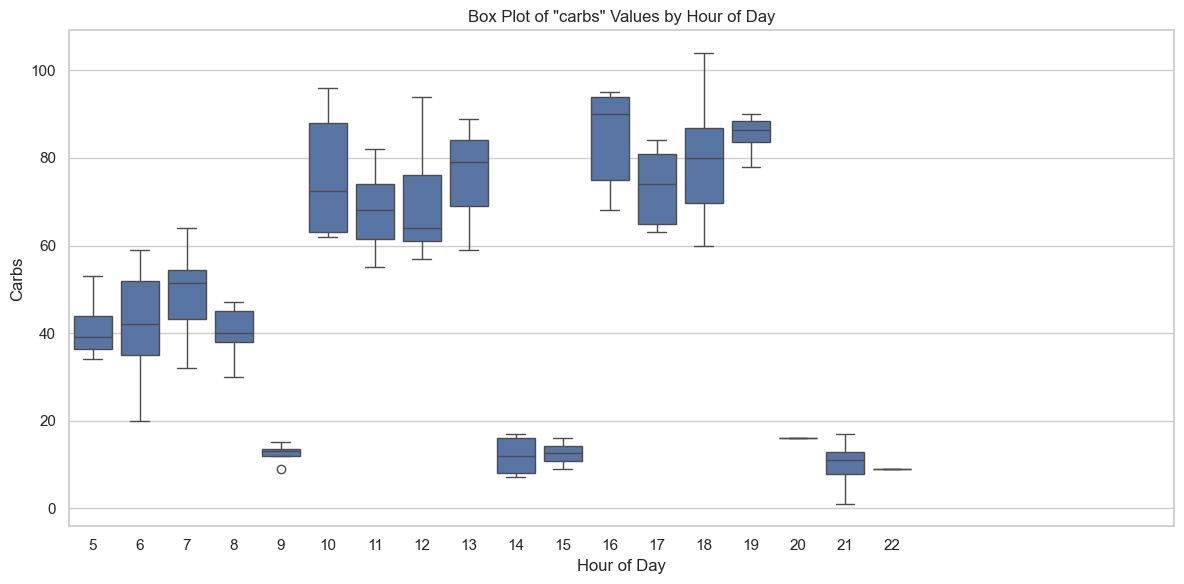

In [6]:
# Add 'hour' column
df['hour'] = df.index.hour

# Set style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='carbs', data=df[df['carbs'] > 0], whis=1.5, showfliers=True)

plt.title('Box Plot of "carbs" Values by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Carbs')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [7]:
# How varied is the starting bg for a meal? 
starting_bgs = df[df['carbs'] > 0]['CGM']
print("Min bg,", starting_bgs.min())
print("Max bg,", starting_bgs.max())
print("Mean bg,", starting_bgs.mean())
print("Std bg,", starting_bgs.std())

Min bg, 39.0
Max bg, 222.1315585503311
Mean bg, 122.72665010075846
Std bg, 36.9343275844157


<Axes: ylabel='Frequency'>

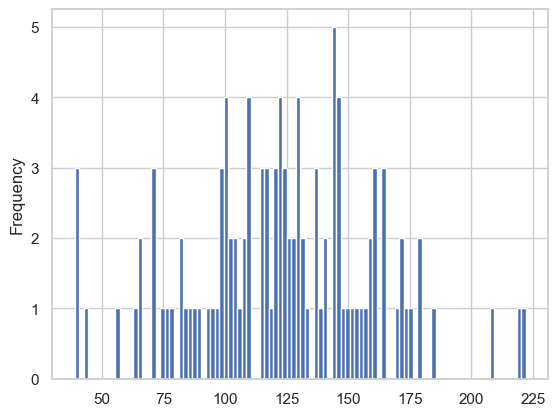

In [8]:
starting_bgs.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

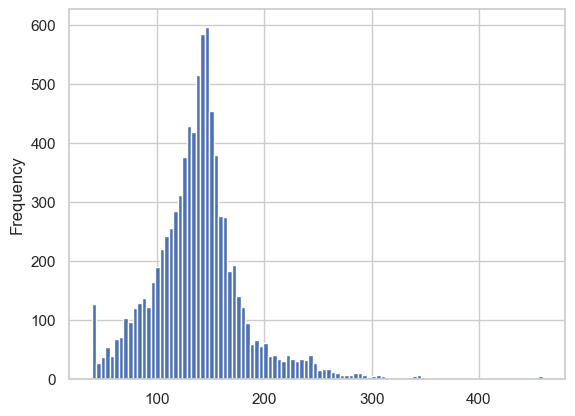

In [9]:
df['CGM'].plot.hist(bins=100)

In [30]:
df[df['CGM'] < 40]

,id,CGM,carbs,insulin,scheduled_basal,basal,bolus,TDD,isf,cr,insulin_type,weight,ice,iob,hour
date,,,,,,,,,,,,,,,
2025-08-02 00:25:00,adolescent#002,39.198595,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,-0.09,0.0,0
2025-08-02 00:30:00,adolescent#002,39.108604,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.58,0.0,0
2025-08-02 00:35:00,adolescent#002,39.686088,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.64,0.0,0
2025-08-02 01:20:00,adolescent#002,39.000000,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.00,0.0,1
2025-08-02 01:25:00,adolescent#002,39.000000,0.0,0.076500,0.9180,0.9180,0.0,68.79,26.17,7.27,novolog,112.537033,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-13 23:35:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23
2025-08-13 23:40:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23
2025-08-13 23:45:00,child#010,39.000000,0.0,0.033125,0.3975,0.3975,0.0,21.30,84.51,23.48,novolog,77.631413,0.00,0.0,23


The long-lasting hypos are probably because the controller uses a simple bolus-basal strategy, and there is no mechanisms and no meals added to save hypos. 

In [41]:
print("TIR", round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100))
print("TAR", round(len(df[df['CGM'] >= 180]) / len(df) * 100))
print("TBR", round(len(df[df['CGM'] <= 70]) / len(df) * 100))

TIR 69
TAR 8
TBR 23


Dosing is generally aggressive in this strategy, a more standard distribution would be TBR 2-4% and TAR ~30%.

## Metabolic Events

In [10]:
metabolic_events = pd.read_csv('metabolic_events_simglucose.csv', parse_dates=['date'], index_col='date')

<Axes: >

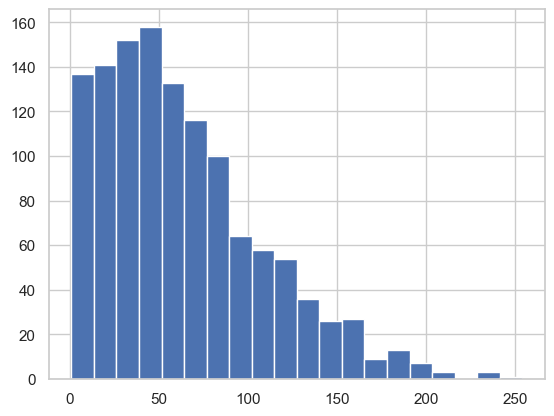

In [16]:
metabolic_events.carbs.hist(bins=20)

In [11]:
metabolic_events.head()

,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,patient_id,total_daily_doses,age,gender,...,target_69,target_70,target_71,target_72,target_73,target_74,target_75,target_76,target_77,target_78
date,,,,,,,,,,,,,,,,,,,,,
2025-08-01 08:05:00,0.866025,-5.000000e-01,-0.433884,-0.900969,-0.866025,-0.5,adolescent#001,39.31,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-08-01 13:10:00,-0.258819,-9.659258e-01,-0.433884,-0.900969,-0.866025,-0.5,adolescent#001,39.31,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-08-01 18:20:00,-1.000000,-1.836970e-16,-0.433884,-0.900969,-0.866025,-0.5,adolescent#001,39.31,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-08-02 07:20:00,0.965926,-2.588190e-01,-0.974928,-0.222521,-0.866025,-0.5,adolescent#001,39.31,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-08-02 11:15:00,0.258819,-9.659258e-01,-0.974928,-0.222521,-0.866025,-0.5,adolescent#001,39.31,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
target_cols = [col for col in metabolic_events.columns if col.startswith('target_')]
measured_carbs = metabolic_events[target_cols].sum(axis=1) * 500 / 1800

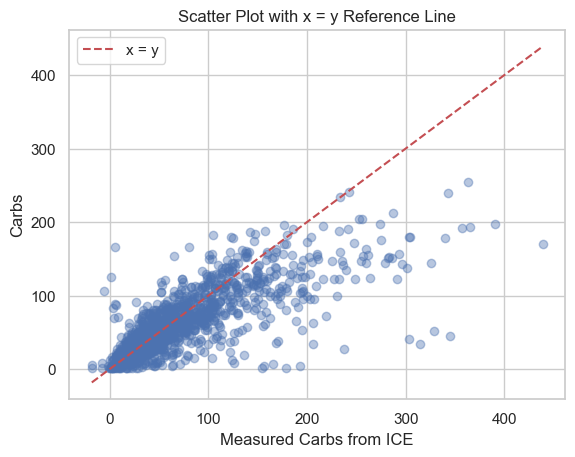

In [13]:
x = np.array(measured_carbs)
y = np.array(metabolic_events['carbs'])

# Scatter plot
plt.scatter(x, y, alpha=0.4)

# Add red dashed line for x = y
min_val = min(np.min(x), np.min(y))
max_val = max(np.max(x), np.max(y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='x = y')

# Labels and legend
plt.xlabel('Measured Carbs from ICE')
plt.ylabel('Carbs')
plt.legend()
plt.title('Scatter Plot with x = y Reference Line')

plt.show()

In [51]:
np.corrcoef(x, y)

array([[1.        , 0.76401232],
       [0.76401232, 1.        ]])

In [52]:
# What about if we use the setting from the stored therapy settings in Quest.csv?
metabolic_events_stored_settings = pd.read_csv('metabolic_events_simglucose_contr-bolus-basal_computed-settings-False.csv', parse_dates=['date'], index_col='date')

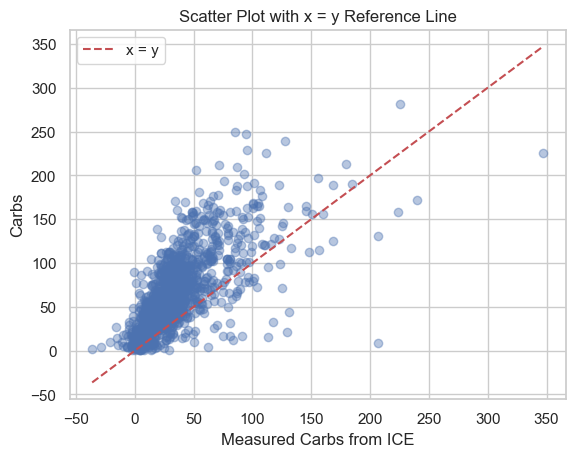

In [53]:
target_cols = [col for col in metabolic_events_stored_settings.columns if col.startswith('target_')]
measured_carbs = metabolic_events_stored_settings[target_cols].sum(axis=1) * 500 / 1800

x = np.array(measured_carbs)
y = np.array(metabolic_events_stored_settings['carbs'])

# Scatter plot
plt.scatter(x, y, alpha=0.4)

# Add red dashed line for x = y
min_val = min(np.min(x), np.min(y))
max_val = max(np.max(x), np.max(y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='x = y')

# Labels and legend
plt.xlabel('Measured Carbs from ICE')
plt.ylabel('Carbs')
plt.legend()
plt.title('Scatter Plot with x = y Reference Line')

plt.show()

In [54]:
np.corrcoef(x, y)

array([[1.        , 0.69835072],
       [0.69835072, 1.        ]])

This definitely changed the plot but not exactly as we expected - and the correlation is actually a bit lower. But what we see here might be due to change point detection; Large meals are measured as lower in terms of ICE. 

In [ ]:
# TODO: use redshift for comparison, example in serverless-api, a notebook, big data analysis

notes:
- how much synthetic data to use?
    - carb prediction sensitivity (adherence to carb feature) vs accuracy metric --> increase sensitivity while keeping the accuracy around the same
    - also increasing the predicted variance while keeping the accuracy
    - pareto optimization based on this
    - clear decision making criterion: pareto front, fraction of synthetic data vs "real" data
- write code that is reusable; for rerunning the whole pipeline with a different subset of simulator data or different simulator data for generating this pareto front metric
    - setup modal / aws
- run a lot of experiments with different fractions

# TIR for Various Controllers

We check the TIR for the various controllers.

In [240]:
files = [
    'simglucose_contr-bolus-basal_computed-settings-True.csv',
    'simglucose_contr-bolus-basal_computed-settings-False.csv',
    'simglucose_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv',
    'simglucose_contr-pid-bolus-1e-06-5e-08-0_computed-settings-True.csv',
    'loop_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv'
]

In [241]:
for file in files:
    df = pd.read_csv(file)
    print("File: ", file)
    print(f"TIR {round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100)}%")
    print(f"TAR {round(len(df[df['CGM'] >= 180]) / len(df) * 100)}%")
    print(f"TBR {round(len(df[df['CGM'] <= 70]) / len(df) * 100)}%")
    print('')

File:  simglucose_contr-bolus-basal_computed-settings-True.csv
TIR 69%
TAR 8%
TBR 23%

File:  simglucose_contr-bolus-basal_computed-settings-False.csv
TIR 71%
TAR 9%
TBR 20%
File:  simglucose_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv
TIR 37%
TAR 30%
TBR 32%

File:  simglucose_contr-pid-bolus-1e-06-5e-08-0_computed-settings-True.csv
TIR 72%
TAR 8%
TBR 20%
File:  loop_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv
TIR 36%
TAR 29%
TBR 34%


In [17]:
df_loop = pd.read_csv('loop_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv')
ids = df_loop.id.unique()
for pid in ids:
    print("pid: ", pid)
    df = df_loop[df_loop['id'] == pid]
    print(f"TIR {round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100)}%")
    print(f"TAR {round(len(df[df['CGM'] >= 180]) / len(df) * 100)}%")
    print(f"TBR {round(len(df[df['CGM'] <= 70]) / len(df) * 100)}%")
    print('')

pid:  adolescent#001
TIR 76%
TAR 24%
TBR 0%

pid:  adolescent#002
TIR 27%
TAR 38%
TBR 35%

pid:  adolescent#003
TIR 34%
TAR 28%
TBR 38%

pid:  adolescent#004
TIR 32%
TAR 32%
TBR 36%

pid:  adolescent#005
TIR 29%
TAR 33%
TBR 39%

pid:  adolescent#006
TIR 51%
TAR 35%
TBR 14%

pid:  adolescent#007
TIR 27%
TAR 35%
TBR 37%

pid:  adolescent#008
TIR 32%
TAR 41%
TBR 27%

pid:  adolescent#009
TIR 46%
TAR 30%
TBR 24%

pid:  adolescent#010
TIR 35%
TAR 31%
TBR 34%

pid:  adult#001
TIR 64%
TAR 33%
TBR 3%

pid:  adult#002
TIR 67%
TAR 33%
TBR 0%

pid:  adult#003
TIR 52%
TAR 40%
TBR 9%

pid:  adult#004
TIR 39%
TAR 34%
TBR 27%

pid:  adult#005
TIR 54%
TAR 45%
TBR 1%

pid:  adult#006
TIR 37%
TAR 31%
TBR 32%

pid:  adult#007
TIR 49%
TAR 31%
TBR 20%

pid:  adult#008
TIR 62%
TAR 36%
TBR 2%

pid:  adult#009
TIR 37%
TAR 44%
TBR 20%

pid:  adult#010
TIR 55%
TAR 39%
TBR 6%

pid:  child#001
TIR 28%
TAR 29%
TBR 42%

pid:  child#002
TIR 1%
TAR 6%
TBR 92%

pid:  child#003
TIR 2%
TAR 5%
TBR 92%

pid:  child#004
TI

In [125]:
df_pid = pd.read_csv('simglucose_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv')
ids = df_pid.id.unique()
for pid in ids:
    print("pid: ", pid)
    df = df_pid[df_pid['id'] == pid]
    print(f"TIR {round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100)}%")
    print(f"TAR {round(len(df[df['CGM'] >= 180]) / len(df) * 100)}%")
    print(f"TBR {round(len(df[df['CGM'] <= 70]) / len(df) * 100)}%")
    print('')

pid:  adolescent#001
TIR 79%
TAR 21%
TBR 0%

pid:  adolescent#002
TIR 16%
TAR 31%
TBR 52%

pid:  adolescent#003
TIR 36%
TAR 30%
TBR 35%

pid:  adolescent#004
TIR 42%
TAR 33%
TBR 25%

pid:  adolescent#005
TIR 39%
TAR 30%
TBR 31%

pid:  adolescent#006
TIR 58%
TAR 30%
TBR 12%

pid:  adolescent#007
TIR 24%
TAR 35%
TBR 41%

pid:  adolescent#008
TIR 29%
TAR 44%
TBR 27%

pid:  adolescent#009
TIR 54%
TAR 29%
TBR 17%

pid:  adolescent#010
TIR 26%
TAR 33%
TBR 40%

pid:  adult#001
TIR 60%
TAR 35%
TBR 6%

pid:  adult#002
TIR 62%
TAR 38%
TBR 0%

pid:  adult#003
TIR 50%
TAR 41%
TBR 9%

pid:  adult#004
TIR 44%
TAR 30%
TBR 26%

pid:  adult#005
TIR 45%
TAR 46%
TBR 9%

pid:  adult#006
TIR 28%
TAR 38%
TBR 35%

pid:  adult#007
TIR 44%
TAR 33%
TBR 23%

pid:  adult#008
TIR 66%
TAR 32%
TBR 1%

pid:  adult#009
TIR 43%
TAR 40%
TBR 16%

pid:  adult#010
TIR 52%
TAR 38%
TBR 9%

pid:  child#001
TIR 24%
TAR 25%
TBR 50%

pid:  child#002
TIR 1%
TAR 8%
TBR 92%

pid:  child#003
TIR 3%
TAR 8%
TBR 89%

pid:  child#004
TI

In [ ]:
df_loop = pd.read_csv('simglucose_contr-bolus-basal_computed-settings-True.csv')
ids = df_loop.id.unique()
for pid in ids:
    print("pid: ", pid)
    df = df_loop[df_loop['id'] == pid]
    print(f"TIR {round(len(df[(df['CGM'] > 70) & (df['CGM'] < 180)]) / len(df) * 100)}%")
    print(f"TAR {round(len(df[df['CGM'] >= 180]) / len(df) * 100)}%")
    print(f"TBR {round(len(df[df['CGM'] <= 70]) / len(df) * 100)}%")
    print('')

In [20]:
# Looking into child #008: 
df_loop = pd.read_csv('simglucose_contr-bolus-basal_computed-settings-True.csv')
df = df_loop[df_loop['id'] == "child#008"]

In [21]:
df

,date,id,CGM,carbs,insulin,scheduled_basal,basal,bolus,TDD,isf,cr,insulin_type,weight,ice,iob
7776,2025-08-04 00:00:00,child#008,166.308055,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,NaN,NaN
7777,2025-08-04 00:05:00,child#008,169.528010,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,NaN,0.000000
7778,2025-08-04 00:10:00,child#008,169.580304,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,NaN,0.000000
7779,2025-08-04 00:15:00,child#008,167.257655,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,NaN,0.000000
7780,2025-08-04 00:20:00,child#008,162.730152,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,2025-08-04 23:35:00,child#008,167.668272,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,-11.08,0.522295
8060,2025-08-04 23:40:00,child#008,152.925356,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,-8.70,0.472799
8061,2025-08-04 23:45:00,child#008,140.798939,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,-6.47,0.426550
8062,2025-08-04 23:50:00,child#008,131.133507,0.0,0.028333,0.34,0.34,0.0,24.32,74.0,20.56,novolog,52.324577,-4.63,0.383425


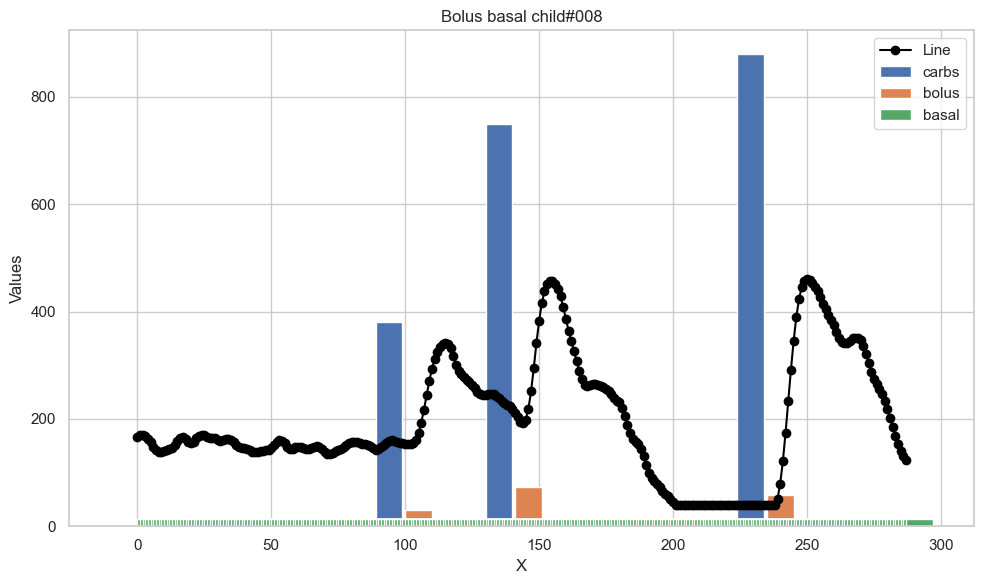

In [37]:
df = pd.read_csv('simglucose_contr-bolus-basal_computed-settings-True.csv')
df = df[df['id'] == "child#008"]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='Line')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal child#008')
plt.tight_layout()
plt.show()

In [35]:
df.basal.head()

7776    0.34
7777    0.34
7778    0.34
7779    0.34
7780    0.34
Name: basal, dtype: float64

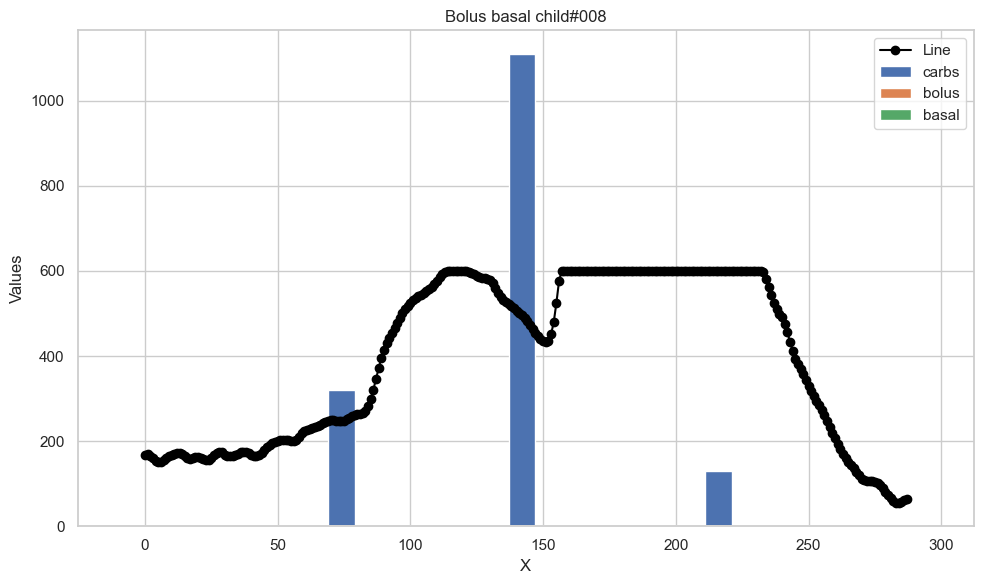

In [39]:
df = pd.read_csv('loop_contr-pid-automated-1e-06-5e-08-0_computed-settings-True.csv')
df = df[df['id'] == "child#008"].head(288)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='Line')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal child#008')
plt.tight_layout()
plt.show()

In [42]:
df[['basal', 'bolus']]

,basal,bolus
108864,0.024,-0.00
108865,0.024,-0.00
108866,0.024,-0.00
108867,0.024,-0.00
108868,0.024,-0.00
...,...,...
109147,0.024,0.09
109148,0.024,0.09
109149,0.024,0.09
109150,0.024,0.09


In [113]:
df_test = pd.read_csv('simglucose_test_contr-loop_computed-settings-True.csv')

In [106]:
df_test

,date,id,CGM,carbs,basal,bolus,insulin,TDD,scheduled_basal,isf,cr,insulin_type,weight,ice,iob
0,2025-08-04 00:00:00,adult#006,133.037762,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,NaN
1,2025-08-04 00:05:00,adult#006,133.288168,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.057528
2,2025-08-04 00:10:00,adult#006,127.504080,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.115056
3,2025-08-04 00:15:00,adult#006,119.670611,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.172446
4,2025-08-04 00:20:00,adult#006,113.513783,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.229442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2025-08-07 23:35:00,adult#006,93.018336,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,1.17,-0.526938
1148,2025-08-07 23:40:00,adult#006,94.771400,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,-1.03,-0.451401
1149,2025-08-07 23:45:00,adult#006,94.354929,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,0.47,-0.375205
1150,2025-08-07 23:50:00,adult#006,95.444511,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,6.13,-0.298800


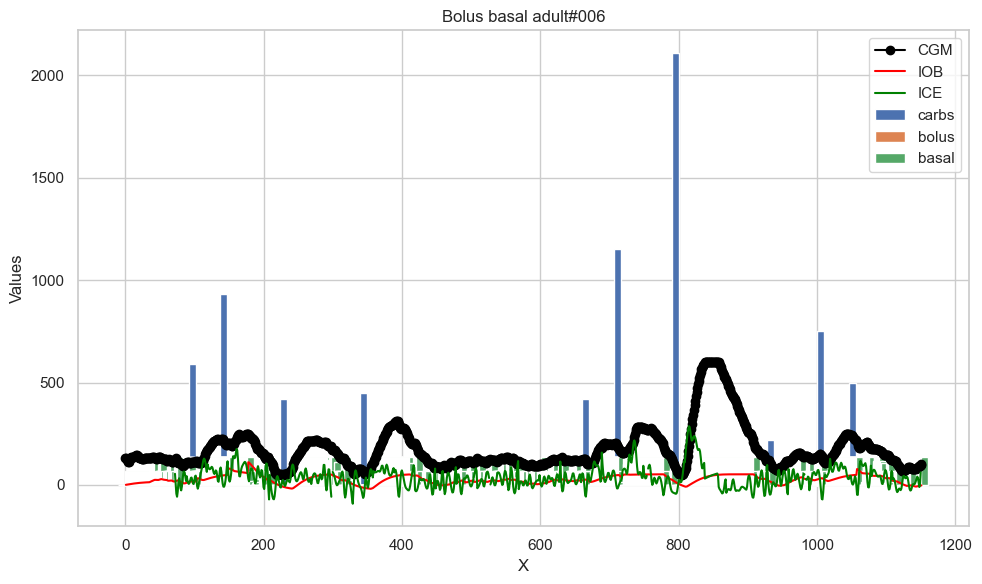

In [112]:
df = df_test
#df = df[df['id'] == "child#008"].head(288*4)
df = df[df['id'] == "adult#006"].head(288*4)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='CGM')
ax1.plot(x, df['iob']*10, color='red', label='IOB')
ax1.plot(x, df['ice']*10, color='green', label='ICE')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal adult#006')
plt.tight_layout()
plt.show()

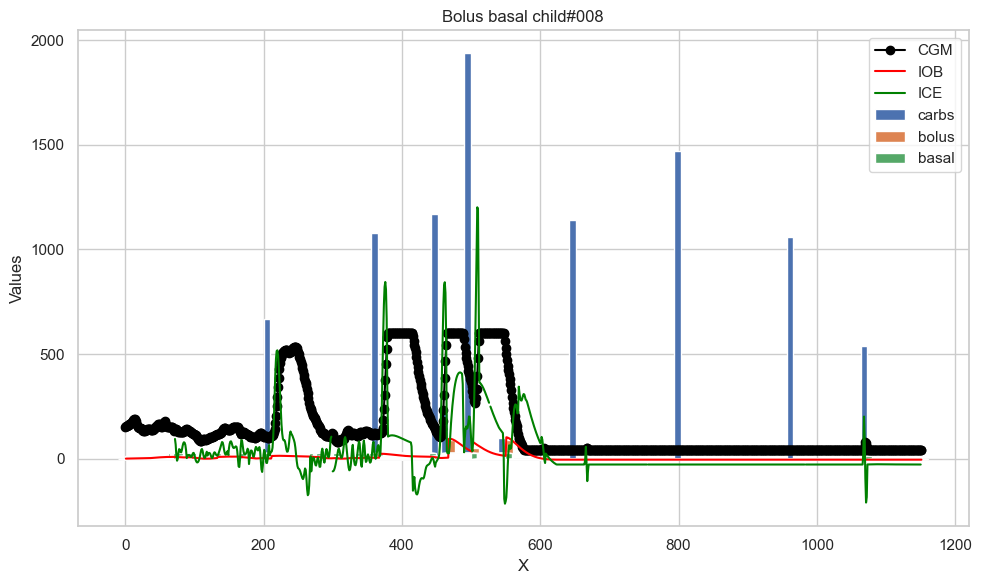

In [115]:
df = df_test
df = df[df['id'] == "child#008"].head(288*4)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='CGM')
ax1.plot(x, df['iob']*10, color='red', label='IOB')
ax1.plot(x, df['ice']*10, color='green', label='ICE')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal child#008')
plt.tight_layout()
plt.show()

In [108]:
df_test.bolus.sum()

np.float64(15.336208333333335)

In [109]:
df_test[df_test['carbs'] > 0]

,date,id,CGM,carbs,basal,bolus,insulin,TDD,scheduled_basal,isf,cr,insulin_type,weight,ice,iob
102,2025-08-04 08:30:00,adult#006,112.043269,59.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,4.54,1.686927
147,2025-08-04 12:15:00,adult#006,196.820833,93.0,3.3900,0.0,0.282500,55.16,1.03,32.64,9.07,novolog,145.718768,8.98,4.834035
176,2025-08-04 14:40:00,adult#006,250.596717,2.0,3.4490,0.0,0.287417,55.16,1.03,32.64,9.07,novolog,145.718768,8.14,5.833917
234,2025-08-04 19:30:00,adult#006,53.705680,42.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,2.29,-1.381515
349,2025-08-05 05:05:00,adult#006,61.604582,45.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,2.31,-1.644046
670,2025-08-06 07:50:00,adult#006,104.349575,42.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,4.96,1.883388
717,2025-08-06 11:45:00,adult#006,159.814137,115.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,2.30,3.975297
800,2025-08-06 18:40:00,adult#006,52.859330,211.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,1.45,0.533800
938,2025-08-07 06:10:00,adult#006,80.342922,22.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,0.71,0.629201
1010,2025-08-07 12:10:00,adult#006,111.208698,75.0,0.0000,0.0,0.000000,55.16,1.03,32.64,9.07,novolog,145.718768,1.19,2.825887


In [110]:
df_test

,date,id,CGM,carbs,basal,bolus,insulin,TDD,scheduled_basal,isf,cr,insulin_type,weight,ice,iob
0,2025-08-04 00:00:00,adult#006,133.037762,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,NaN
1,2025-08-04 00:05:00,adult#006,133.288168,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.057528
2,2025-08-04 00:10:00,adult#006,127.504080,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.115056
3,2025-08-04 00:15:00,adult#006,119.670611,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.172446
4,2025-08-04 00:20:00,adult#006,113.513783,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,NaN,0.229442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2025-08-07 23:35:00,adult#006,93.018336,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,1.17,-0.526938
1148,2025-08-07 23:40:00,adult#006,94.771400,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,-1.03,-0.451401
1149,2025-08-07 23:45:00,adult#006,94.354929,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,0.47,-0.375205
1150,2025-08-07 23:50:00,adult#006,95.444511,0.0,1.7245,0.0,0.143708,55.16,1.03,32.64,9.07,novolog,145.718768,6.13,-0.298800


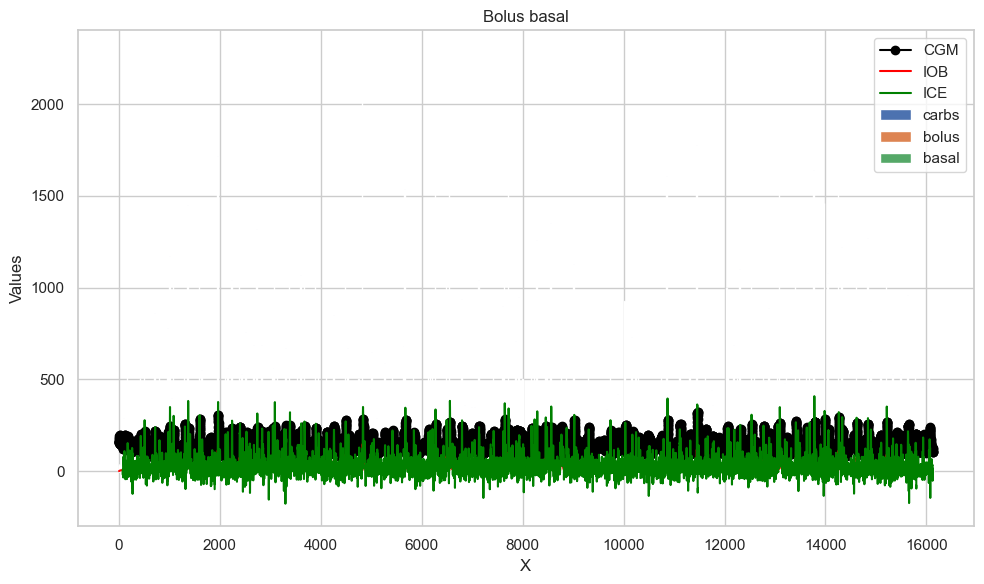

In [127]:
df = pd.read_csv('simglucose-adults_contr-bolus-basal_computed-settings-True_56-days.csv')
df = df[df['id'] == "adult#004"]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='CGM')
ax1.plot(x, df['iob']*10, color='red', label='IOB')
ax1.plot(x, df['ice']*10, color='green', label='ICE')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal')
plt.tight_layout()
plt.show()

/Users/miriamk.wolff/Documents/Repositories/Replica/simglucose/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


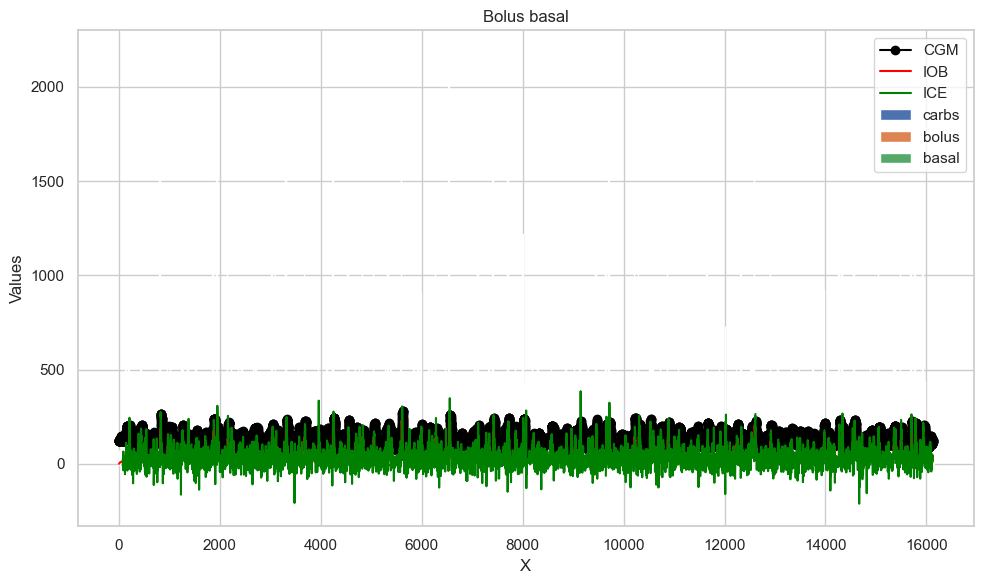

In [128]:
df = pd.read_csv('simglucose-adults_contr-bolus-basal_computed-settings-True_56-days.csv')
df = df[df['id'] == "adult#006"]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars (can be stacked or side-by-side)
bar_width = 10.0
x = np.array(range(len(df)))

ax1.bar(x - bar_width/2, df['carbs']*10, width=bar_width, label='carbs', alpha=1.0)
ax1.bar(x + bar_width/2, df['bolus']*10, width=bar_width, label='bolus', alpha=1.0)
ax1.bar(x + bar_width/2, df['basal']*40, width=bar_width, label='basal', alpha=1.0)

# Plot line (on same y-axis)
ax1.plot(x, df['CGM'], color='black', marker='o', label='CGM')
ax1.plot(x, df['iob']*10, color='red', label='IOB')
ax1.plot(x, df['ice']*10, color='green', label='ICE')

# Labels and legend
ax1.set_xlabel('X')
ax1.set_ylabel('Values')
ax1.legend()
plt.title('Bolus basal')
plt.tight_layout()
plt.show()

<Axes: >

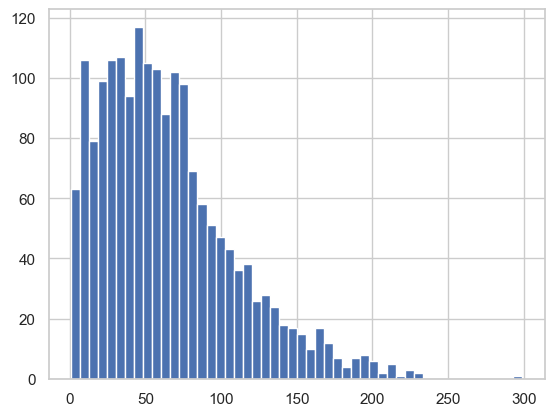

In [133]:
df = pd.read_csv('simglucose-adults_contr-bolus-basal_computed-settings-True_56-days.csv')
df[df['carbs'] > 0].carbs.hist(bins=50)

# Synthetic Dataset Generation Decisions

We generate a dataset with: 
- Controllers:
    - Bolus-basal
    - PID + meal boluses
    - PID fully automated
    - Loop with dosing strategy temporary basal
    - Loop with dosing strategy automatic bolus
- The adult subjects, to avoid the subjects that are very sensitive to outlier meals
- Days = 7*8 --> Eight weeks of data

This will generate around 9000-11000 meal events. 